<h1 align="center"> Homework4 My first Neural Network </h1>
Class: CS3210 Machine Learning

Professor: Feng Jiang

Created on: 4/1/2024  
Author: Ling Thang

Due Date: 4/5/2024

---
Source Code provided by Professor Feng Jiang  
`8_NN_2layer.py`

Additions to the code:
Updated the code to include the following:
- Increased the number of Nuerons in the hidden layers from 4 to 6
- Increased the number of Nuerons in the output layer from 1 to 2
- Initialized `losses` list to store the loss values
- Added `predict` function to predict the output given an input
- Visualized the loss values using matplotlib


<h1 align="center">Assignment Description </h1>

(Only NumPy and data visualization packages are allowed.)
1. Read the demo code posted of simple NN in requirement.
2. Trains the NN more than 1,000 times and observe the change of the loss value.
3. Implement a “3-6-2” network ( demo code 8_NN_2layer.py can be helpful) to fit the following data:

```python
X=np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0]], dtype=float)
y=np.array([[0,1],[1,0],[0,1],[1,0],[0,1],[1,0],[0,1]], dtype=float)
```

4. What are the dimension of weight matrix 1 and weight matrix 2? (4pts)
5. Test the following sample and write down the predicted y values for it. (4 pts)
Testing sample one: X1 = [1, 1, 1]    y_pred = ?
6. Could you guess what is the meaning of y1 and y2 (first and second value in the label value for each sample)? (2 pts)



# Step 1:
## Importing the required libraries
`Only NumPy and data visualization packages are allowed`

In [ ]:
import numpy as np

# Training data: X - Input data (7 samples, 3 features), y - Output data (7 samples, 2 classes)

X=np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0]], dtype=float) # 3 bit binary number
# test case in decimal: 0, 1, 2, 3, 4, 5, 6
y=np.array([[0,1],[1,0],[0,1],[1,0],[0,1],[1,0],[0,1]], dtype=float) # [odd, even]

# Activation function
def sigmoid(s):
    return 1/(1+np.exp(-s))

# Derivative of activation function
def sigmoid_derivative(d):
    return d*(1-d)


## Function Description

The sigmoid function is a commonly used activation function in neural networks. It squashes the input values to a range between 0 and 1. The sigmoid function is defined as:

$$
\text{sigmoid}(s) = \frac{1}{1 + e^{-s}}
$$

where \( s \) is the input value.

```python
def sigmod(s):
    return 1 / (1 + np.exp(-s))
```

<h3>Explanation for use</h3>

given the dataset for the assignment, a Sigmoid Function was most appropriate as it squashes the input values to a range between 0 and 1. This is important as the dataset is a binary classification problem.

## Sigmoid Derivative

$$
\text{sigmoid}'(s) = \text{sigmoid}(s) \times \left(1 - \text{sigmoid}(s)\right)
$$

```python
def sigmoid_derivative(d):
    return d * (1 - d)
```

<h3>Explanation for use</h3>

The derivative of the sigmoid function is used in the backpropagation algorithm to update the weights of the neural network. Backpropagation trains the NN by adjusting the weights of the network to minimize the error in the output. After each iteration, network learns the patterns in the data which we can tell by the loss value.

# Step 2:
## Neural Network Class
### Network Architecture
Following the specification of the assignment the Neural Network will Implement a "3-6-3" Network

### 3-6-2 Network
* Input Layer: 3 Neurons
* Hidden Layer: 6 Neurons
* Output Layer: 2 Neurons


In [ ]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.y = y
        self.output = np.zeros(y.shape)
        # 6 nodes in the hidden layer
        self.weights1 = np.random.rand(self.input.shape[1],6)
        # 2 nodes in the output layer
        self.weights2 = np.random.rand(6,2)
        # Store the loss values
        self.losses = []

    def feedForward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2

    def backprop(self):
        d_weights2 = np.dot(self.layer1.T, 2*(self.y -
        self.output)*sigmoid_derivative(self.output))
        d_weights1 = np.dot(self.input.T, np.dot(2*(self.y -self.output)*
        sigmoid_derivative(self.output),
        self.weights2.T)*
        sigmoid_derivative(self.layer1))
        self.weights1 += d_weights1
        self.weights2 += d_weights2

    def train(self, X, y):
        self.output = self.feedForward()
        self.backprop()
        # claculate the loss
        loss = np.mean(np.square(y - self.output))
        self.losses.append(loss)

    # Additional Prediction function
    def predict(self, X):
        self.input = X
        return self.feedForward()

# Dimension of Weight Matrix 1 and Weight Matrix 2

<h4>The dimension of the weight matrix 1 and weight matrix 2 are as follows:</h4>

```python
self.weights1 = np.random.rand(self.input.shape[1],6)

self.weights2 = np.random.rand(6,2)
```

`self.weights1` is a 3 input feature of (x1,x2,x3)
* Therefore the dimension of `self.weights1` is (3,6)

`self.weights2` is a 6 input feature of (h1,h2,h3,h4,h5,h6)
* Notes: This matrix is the `Hidden Layer`

# Training the Neural Network on 2000 iterations

In [ ]:
NN = NeuralNetwork(X,y)
for i in range(2000):
    if i % 200 == 0:
        print ("for iteration # " + str(i) + "\n")
        print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(NN.feedForward()))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.feedForward())))) # mean sum squared loss
        print ("\n")

    NN.train(X, y)

for iteration # 0

Input : 
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]]
Actual Output: 
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Predicted Output: 
[[0.83092264 0.83581563]
 [0.87683498 0.88558691]
 [0.88244622 0.88646125]
 [0.91137489 0.91747686]
 [0.86840363 0.8826575 ]
 [0.90211371 0.9152255 ]
 [0.90650745 0.91637953]]
Loss: 
0.40013607297756215


for iteration # 200

Input : 
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]]
Actual Output: 
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Predicted Output: 
[[0.05050714 0.94950632]
 [0.97580774 0.02445837]
 [0.01144183 0.98848244]
 [0.97200325 0.02820704]
 [0.01126161 0.9881771 ]
 [0.97121304 0.02879452]
 [0.00321746 0.9966337 ]]
Loss: 
0.0007195133948541715


for iteration # 400

Input : 
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 1.]
 [1. 0. 0.]
 [1. 0. 1.]
 [1. 1. 0.]]
Actual Output: 
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1.

# Testing the Neural Network for [1,1,1] : Integer 7

In [ ]:
# Predicting the output for a new input
X_test = np.array([[1,1,1]], dtype=float) # 111 -> 7 -> odd
print ("New Input : " + str(X_test))
# Predicted output should be [1,0] -> odd
print ("Predicted Output: \n" + str(NN.predict(X_test).round()))

New Input : [[1. 1. 1.]]
Predicted Output: 
[[1. 0.]]


# Conclusion

When testing the input `[1,1,1]` which we know to be the integer 7 (an odd) number we should expect the output to be [0,1]  
which is the label for odd numbers.

In the test above the predicted output(rounded) return [0,1] which is the label for odd numbers.  

<h5 align = "center"><strong>  We can conclude that the Neural Network has been trained successfully </strong></h5>


# Meaning of Y1 and Y2 Values

```python
y=np.array([[0,1],[1,0],[0,1],[1,0],[0,1],[1,0],[0,1]], dtype=float)
```
Withn the dataset, is an array of 2 values `[Y1, Y2]`

* Y1: Represents whether the number is Odd or Not
* Y2: Represents whether the number is Even or Not

#### You can also think of this as a binary classification problem where `[Y1, Y2]` translates to `[Odd, Even]`
**Where 1 and 0 are used to represent True and False respectively**

For the input of `[0, 1, 0]` the predicted value is `[0, 1]` which indicates that the number is Even.

`[0, 1, 0]` -> 2 -> Even

For the input of `[1, 1, 1]` the predicted value is `[1, 0]` which indicates that the number is Odd.

`[1, 1, 1]` -> 7 -> Odd


# Visualizing with Matplotlib

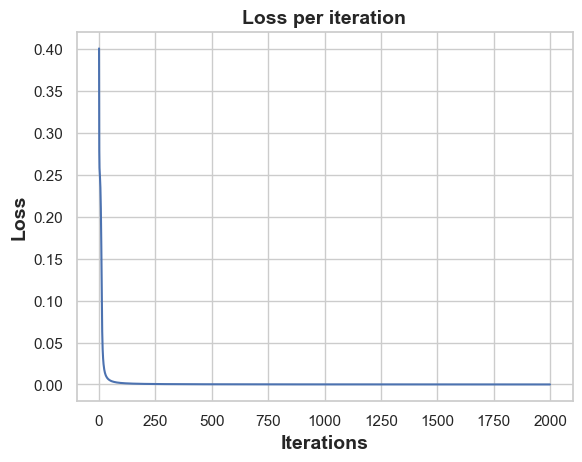

In [ ]:
# Data Visualization Packages
import matplotlib.pyplot as plt

# Plotting the loss per iteration
plt.plot(range(2000), NN.losses)
plt.xlabel('Iterations', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=14, fontweight='bold')
plt.title('Loss per iteration', fontsize=14, fontweight='bold')
plt.show()

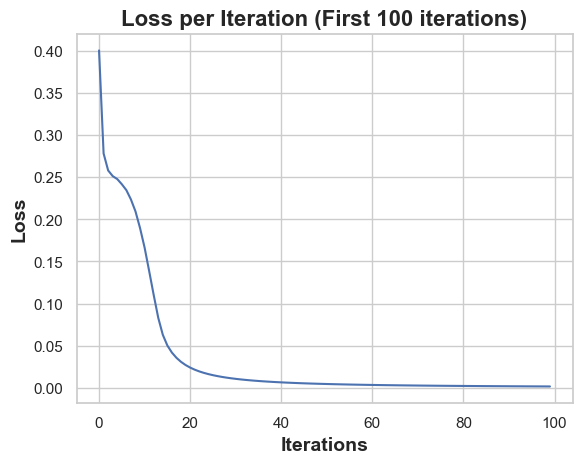

In [ ]:
# Plotting the loss per iteration for the first 100 iterations
plt.plot(range(100), NN.losses[:100])
plt.xlabel('Iterations', fontsize=14, fontweight='bold')
plt.ylabel('Loss', fontsize=14, fontweight='bold')
plt.title('Loss per Iteration (First 100 iterations)', fontsize=16, fontweight='bold')
plt.show()
